In [55]:
import random
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
def calculate_most_recent_monthly_return(ticker):
    stock = yf.Ticker(ticker)
    hist = stock.history(period="2mo")
    hist['Monthly Return'] = hist['Close'].pct_change(periods=21)
    hist = hist[['Monthly Return']].dropna()

    today = datetime.today()
    if today.day == 1:
        most_recent_return = hist.iloc[-1]
    else:
        most_recent_return = hist.iloc[-2]

    return most_recent_return['Monthly Return']

stock_dataframes = {}

{}


In [8]:
stock_list_path = r'Data\constituentssp.csv'
stock_list = pd.read_csv(stock_list_path)

In [40]:
#Run time: 9m 47s
if 'Stock' in stock_list.columns:
    average_return_df = pd.DataFrame(columns=['Average Return'])
    
    for _ in range(500):
        random_tickers = random.sample(stock_list['Stock'].tolist(), 10)
        random_tickers_df = pd.DataFrame(random_tickers, columns=['Stock'])
        
        stock_dataframes = {}
        for ticker in random_tickers:
            stock_dataframes[ticker] = calculate_most_recent_monthly_return(ticker)
        
        random_returns_df = pd.DataFrame(list(stock_dataframes.items()), columns=['Ticker', 'Monthly Return'])
        average_return = random_returns_df['Monthly Return'].mean()
        average_return = round(average_return, 2)
        
        new_row = pd.DataFrame({'Average Return': [average_return]})
        average_return_df = pd.concat([average_return_df, new_row], ignore_index=True)

#FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
#average_return_df = pd.concat([average_return_df, new_row], ignore_index=True)
#Run time: 9m 47s


C:\Users\bsung\AppData\Local\Temp\ipykernel_19832\3127230359.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  average_return_df = pd.concat([average_return_df, new_row], ignore_index=True)


In [46]:
print(average_return_df)

     Average Return
0              0.05
1              0.04
2              0.01
3             -0.03
4              0.03
..              ...
495            0.02
496            0.04
497            0.02
498            0.04
499           -0.02

[500 rows x 1 columns]


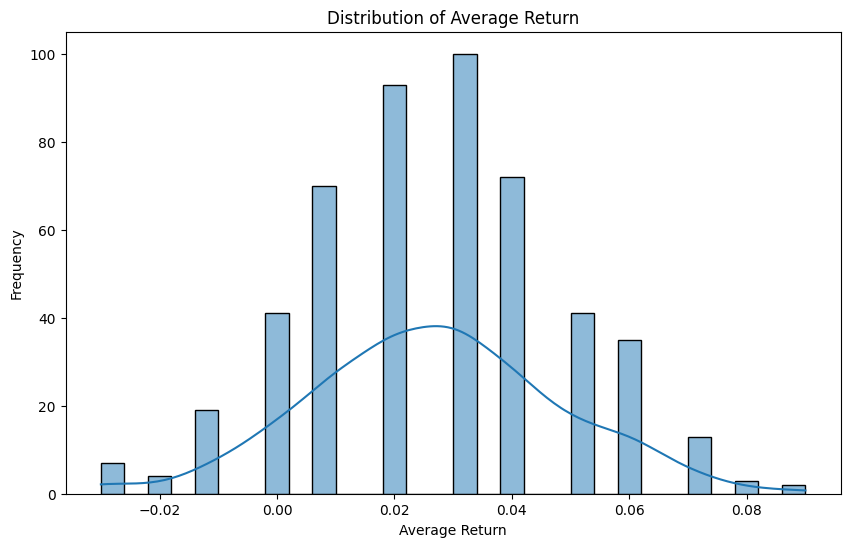

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(average_return_df['Average Return'], kde=True, bins=30)
plt.title('Distribution of Average Return')
plt.xlabel('Average Return')
plt.ylabel('Frequency')
plt.show()